# Car Brand Prediction using RESNET50 architecture 

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Resnet50 architecture

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:

folders = glob('Datasets/train/*')

In [6]:

x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\RAJ\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 47s 20s/step - loss: 5.0404 - accuracy: 0.3594 - val_loss: 9.1649 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 32s 22s/step - loss: 9.7527 - accuracy: 0.3750 - val_loss: 5.9062 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 32s 23s/step - loss: 3.6286 - accuracy: 0.3281 - val_loss: 5.5177 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 23s 16s/step - loss: 6.2051 - accuracy: 0.3906 - val_loss: 4.6155 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 24s 16s/step - loss: 3.6717 - accuracy: 0.5000 - val_loss: 2.2719 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 24s 16s/step - loss: 2.2237 - accuracy: 0.5781 - val_loss: 4.0596 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 23s 16s/step - loss: 3.0362 - accuracy: 0.4062 - val_loss: 1.3770 - val_accuracy: 0.3621
Epoch 8/50
2/2 [===========

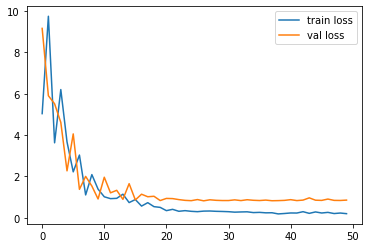

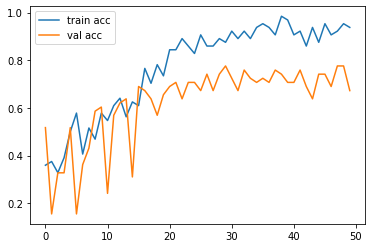

<Figure size 432x288 with 0 Axes>

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\RAJ\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [16]:

y_pred = model.predict(test_set)


In [17]:
y_pred

array([[5.57234466e-01, 2.04766303e-01, 2.37999156e-01],
       [2.48291576e-03, 9.88216102e-01, 9.30087082e-03],
       [4.49255824e-01, 3.35042059e-01, 2.15702131e-01],
       [5.18913893e-03, 3.54169041e-01, 6.40641809e-01],
       [1.19934976e-01, 4.21137869e-01, 4.58927184e-01],
       [4.84612063e-02, 7.82660723e-01, 1.68878019e-01],
       [2.11863909e-02, 1.58954458e-03, 9.77224112e-01],
       [1.34117395e-01, 1.05657568e-02, 8.55316818e-01],
       [5.01992591e-02, 5.42016804e-01, 4.07783866e-01],
       [7.73987398e-02, 1.08281970e-01, 8.14319313e-01],
       [2.75494307e-02, 8.61721933e-01, 1.10728562e-01],
       [1.40371976e-05, 5.82145934e-04, 9.99403834e-01],
       [3.69700342e-02, 6.79543614e-01, 2.83486307e-01],
       [8.40359405e-02, 5.07230461e-01, 4.08733606e-01],
       [4.23354447e-01, 5.24209023e-01, 5.24364524e-02],
       [4.03992385e-02, 2.40999987e-04, 9.59359765e-01],
       [2.20159575e-01, 5.92025578e-01, 1.87814936e-01],
       [5.68002388e-02, 4.46519

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([0, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0,
       1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [22]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [23]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [24]:
x.shape

(224, 224, 3)

In [25]:
x=x/255

In [26]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [27]:
model.predict(img_data)

array([[6.0516619e-04, 1.8870283e-02, 9.8052454e-01]], dtype=float32)

In [28]:
a=np.argmax(model.predict(img_data), axis=1)

In [29]:
a==1

array([False])